<div style="border: 1px solid black">
<b><center><font size="3">Data Wrangling and Exploratory Data Analysis</font></center></b>

<b><center><font size="2"></font></center></b>
</div>

**Notebook Developed by**: Rene Jerez </b>

**Notebook Co-writer by**: ChatGPT </b>

**Notebook Based on**: [Ricardo Campos](https://www.di.ubi.pt/~rcampos)<br>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span>
<a href="#Familiarização com o processo de aquisição de dados através de ficheiros,
packages e APIs." data-toc-modified-id="Informação de uma página web estática 1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Familiarização com o processo de aquisição de dados através de ficheiros,packages e APIs.</a></span></span></li>


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import logging
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Proceda à importação do ficheiro para um Pandas dataframe.

In [2]:
contratos = pd.read_csv("contratos.csv", sep=";")

### 2. Mostre os 5 primeiros registos

In [3]:
contratos.head(5)

,Objeto do Contrato,Tipo de Procedimento,Tipo(s) de Contrato,CPV,CPV Tipo,CPV Designação,CPV Valor,Entidade(s) Adjudicante(s),Entidade(s) Adjudicatária(s),Preço Contratual,...,Descrição do Acordo Quadro,Procedimento Centralizado,Ligação para Peças do Procedimento,Lista de Fornecedores (cocontratantes),Aquisição ao Abrigo de Acordo Quadro de outro Estado-membro da UE,Medidas especiais,Regime,Critérios Materiais,CCP,groupMembers
0,Prestação de serviços para uma solução integra...,Concurso público,Aquisição de serviços,85111800-8,Principal,Serviços de patologia,306000.0 €,"Centro Hospitalar Universitário Cova da Beira,...","ZMWay, Lda. (508085349)",NaN,...,Não aplicável.,False,https://community.vortal.biz/PRODPublic/Tender...,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
1,Aquisição de serviços de reserva de sala e ser...,Ajuste Direto Regime Geral,Aquisição de serviços,70200000-3,Principal,Serviços de arrendamento ou locação de bens im...,5000.0 €,Ordem dos Contabilistas Certificados (503692310),ANIL (501064320),"5.000,00 €",...,Não aplicável.,False,NaN,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
2,Aquisição de serviços de seguro de acidentes d...,Concurso público,Aquisição de serviços,66510000-8,Principal,Serviços de seguros,261353.23 €,"Centro Hospitalar Cova da Beira, EPE (506361659)",Caravela Companhia de Seguros SA (503640549),NaN,...,Não aplicável.,False,https://community.vortal.biz/PRODPublic/Tender...,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
3,Prestação de Serviços para renovação do contra...,Concurso público,Aquisição de serviços,72267000-4,Principal,Serviços de manutenção e reparação de software,47140.32 €,"Centro Hospitalar Cova da Beira, EPE (506361659)","CLARANET II SOLUTIONS, S.A. (510728189)",NaN,...,Não aplicável.,False,https://community.vortal.biz/PRODPublic/Tender...,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
4,Aquisição de Serviços de Seguro de Grupo de Ac...,Consulta Prévia,Aquisição de serviços,66000000-0,Principal,Serviços de finanças e seguros,4.3 €,Beira Serra - Associação Promotora do Desenvol...,Imperbeiras (504455966),"4,30 €",...,Não aplicável.,False,NaN,False,NaN,NaN,Código dos Contratos Públicos ( DL 111-B/2017 ),False,False,NaN


### 3. Mostre o coeficiente de correlação de pearson entre cada par de atributos. Liste os valores de correlação de forma descendente para um atributo à sua escolha.

In [16]:
one_hot_encoded_df = pd.get_dummies(contratos)

c:\Users\rene_\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\rene_\AppData\Local\Temp\ipykernel_13104\3571957243.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjusts plot to fit within figure cleanly.


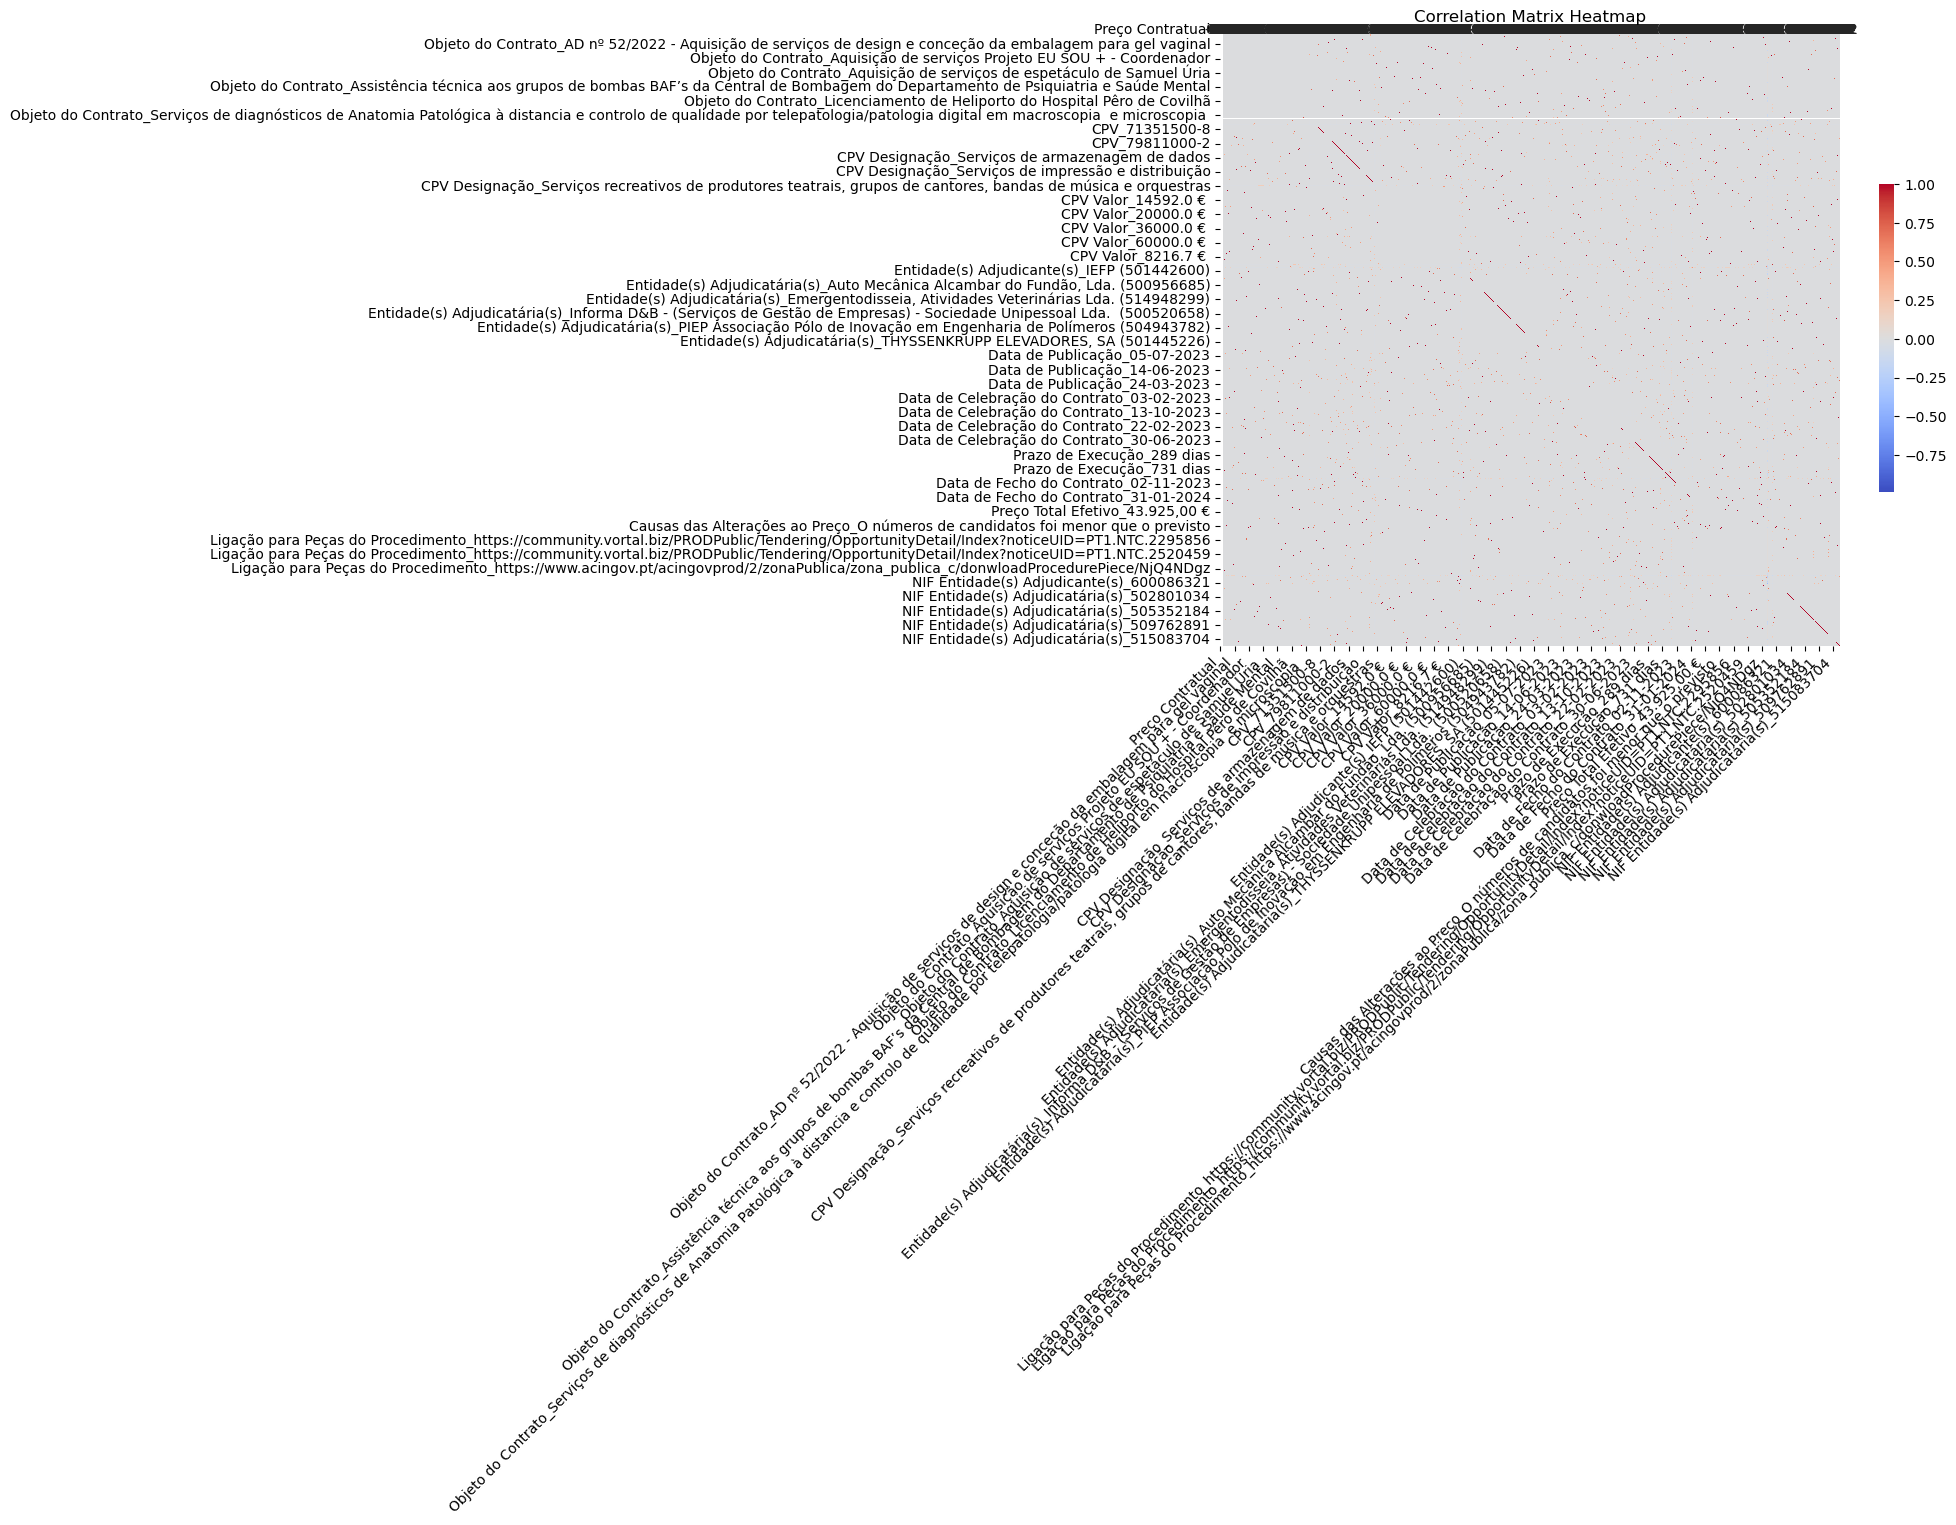

In [20]:
# Assuming 'one_hot_encoded_df' is your one-hot encoded DataFrame
correlation_matrix = one_hot_encoded_df.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})

# Adding title and formatting
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.yticks(rotation=0)  # Keep the y labels horizontal

# Show plot
plt.tight_layout()  # Adjusts plot to fit within figure cleanly.
plt.show()


### 4. Devolva a mediana de um atributo à sua escolha restringindo a um conjunto de dados específico. Exemplo: a mediana da idade das pessoas do sexo feminino.

In [6]:
# Function to convert formatted price to float
def convert_price(price):
    # Check if the price is already a float (or other numeric type)
    if isinstance(price, float):
        return price
    # If it's not a float, it should be a string so we process it
    if isinstance(price, str):
        price = price.replace("€", "").strip()  # Remove the euro symbol and strip white spaces
        price = price.replace(".", "")          # Remove the thousand separator
        price = price.replace(",", ".")         # Change the decimal separator to dot
        return float(price)
    # Add an else case to handle unexpected data types
    else:
        # Optionally handle or log an unexpected data type error
        # For now, just return None or raise an error
        return None

# Apply the conversion function to the DataFrame
contratos['Preço Contratual'] = contratos['Preço Contratual'].apply(convert_price)


In [7]:
filter_df = contratos[contratos['Tipo de Procedimento'] == 'Concurso público']
mediana = filter_df['Preço Contratual'].median()
print(f"Mediana de 'Tipo de Procedimento 'Concurso público' é {mediana}")

Mediana de 'Tipo de Procedimento 'Concurso público' é 43925.0


### 5. Escreva o código que lhe permite contabilizar o número de registos null existente num conjunto de colunas à sua escolha.

In [8]:
def contar_nulos(df, colunas):
    
    null_counts = {}
    for coluna in colunas:
        # Check if the column exists in DataFrame to avoid KeyError
        if coluna in df.columns:
            null_counts[coluna] = df[coluna].isnull().sum()
        else:
            null_counts[coluna] = None  # Or you might raise an error or return a specific message
    return null_counts


In [9]:
lista_colunas = ['Data de Publicação','Data de Celebração do Contrato', 'Prazo de Execução','Local de Execução', 'Fundamentação', 'Causa de Extinção do Contrato','Data de Fecho do Contrato', 'Preço Total Efetivo']
result = contar_nulos(contratos, lista_colunas)
print(result)

{'Data de Publicação': 0, 'Data de Celebração do Contrato': 0, 'Prazo de Execução': 0, 'Local de Execução': 0, 'Fundamentação': 0, 'Causa de Extinção do Contrato': 241, 'Data de Fecho do Contrato': 241, 'Preço Total Efetivo': 241}


### 6. Desenvolva uma função de imputação que proceda à substituição dos valores nulos de uma coluna à sua escolha com o valor da mediana desse atributo. Considere, sempre que possível, diferentes valores de mediana para cada classe (por exemplo, proceda à substituição dos valores nulos da coluna Age de acordo com a mediana da Age apurada para cada uma das três classes existentes (Pclass = 1, Pclass = 2, Pclass =3)). 

In [10]:
def fill_median_by_category(df, value_col, category_col):

    # Calculate the median for each category
    medians = df.groupby(category_col)[value_col].median()

    # Dictionary to keep track of replacements per category
    replacement_counts = {category: 0 for category in df[category_col].unique()}

    # Function to apply to each row to replace NaNs with the category-specific median
    def fill_median(row):
        if pd.isnull(row[value_col]):
            replacement_counts[row[category_col]] += 1  # Increment count for the category
            return medians[row[category_col]]
        return row[value_col]

    # Apply the function across the DataFrame
    df[value_col] = df.apply(fill_median, axis=1)

    # Report the number of replacements
    for category, count in replacement_counts.items():
        print(f"Replaced {count} NaN values in category '{category}' with the median.")

    return df

In [11]:
# Call the function
updated_df = fill_median_by_category(contratos, 'Preço Contratual', 'Tipo de Procedimento')


Replaced 3 NaN values in category 'Concurso público' with the median.
Replaced 0 NaN values in category 'Ajuste Direto Regime Geral' with the median.
Replaced 0 NaN values in category 'Consulta Prévia' with the median.
Replaced 0 NaN values in category 'Ao abrigo de acordo-quadro (art.º 259.º)' with the median.
Replaced 0 NaN values in category 'Ao abrigo de acordo-quadro (art.º 258.º)' with the median.


### 7. Crie novas colunas no seu dataset, potencialmente relacionadas com as colunas atuais (exemplo, a coluna Title (com os valores Mr; Miss; etc) a partir da coluna Name (que inclui os valores Mr. Santos; Miss Filipa).


In [12]:
contratos['NIF Entidade(s) Adjudicante(s)'] = contratos['Entidade(s) Adjudicante(s)'].str.extract('\(([^)]+)\)')

In [13]:
contratos['NIF Entidade(s) Adjudicatária(s)'] = contratos['Entidade(s) Adjudicatária(s)'].str.extract('\(([^)]+)\)')

In [14]:
contratos[['Entidade(s) Adjudicante(s)','Entidade(s) Adjudicatária(s)', 'NIF Entidade(s) Adjudicante(s)','NIF Entidade(s) Adjudicatária(s)']]

,Entidade(s) Adjudicante(s),Entidade(s) Adjudicatária(s),NIF Entidade(s) Adjudicante(s),NIF Entidade(s) Adjudicatária(s)
0,"Centro Hospitalar Universitário Cova da Beira,...","ZMWay, Lda. (508085349)",506361659,508085349
1,Ordem dos Contabilistas Certificados (503692310),ANIL (501064320),503692310,501064320
2,"Centro Hospitalar Cova da Beira, EPE (506361659)",Caravela Companhia de Seguros SA (503640549),506361659,503640549
3,"Centro Hospitalar Cova da Beira, EPE (506361659)","CLARANET II SOLUTIONS, S.A. (510728189)",506361659,510728189
4,Beira Serra - Associação Promotora do Desenvol...,Imperbeiras (504455966),503310557,504455966
...,...,...,...,...
347,Instituto do Emprego e da Formação Profissiona...,ANIL (501064320),501442600,501064320
348,Município da Covilhã (505330768),José Paulo Pina Simão,505330768,NaN
349,Município da Covilhã (505330768),ASSOCIAÇÃO OFP - ORQUESTRA FILARMONICA PORTUGU...,505330768,514317884
350,ICOVI - Infraestruturas e Concessões da Covilh...,Cesab - Centro Serviços do Ambiente (502883308),508282322,502883308


### 8. Proceda a uma análise exploratória de dados que considere relevante no contexto do seu ficheiro. 

c:\Users\rene_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


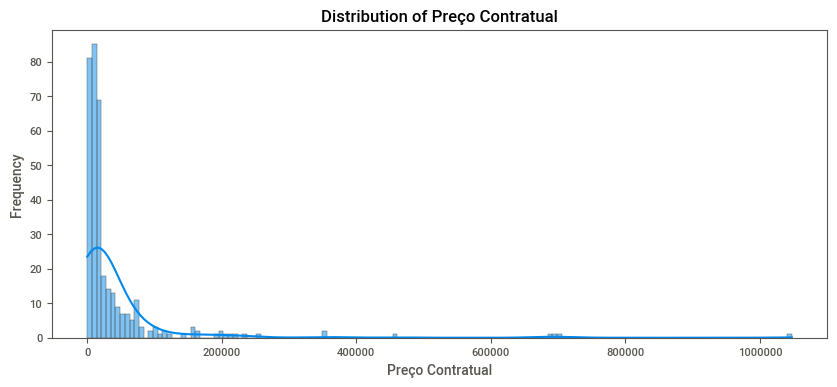

c:\Users\rene_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


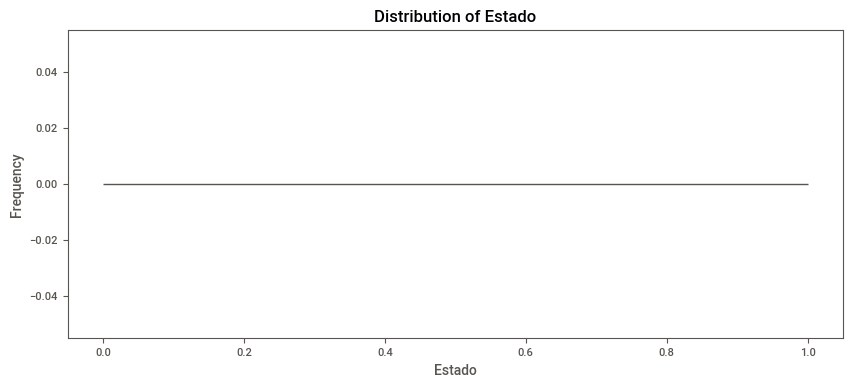

c:\Users\rene_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


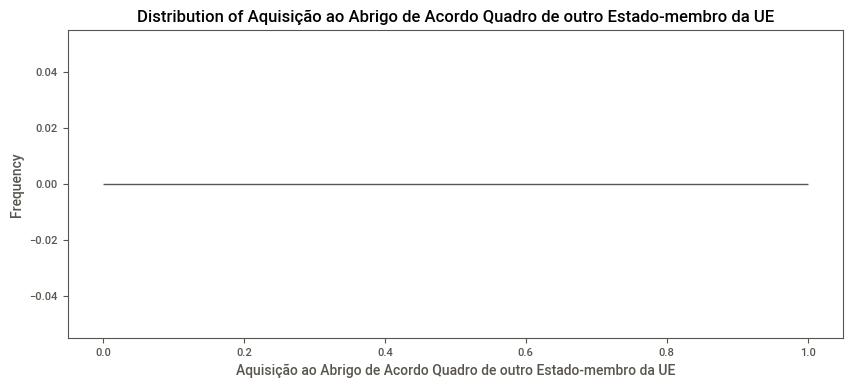

c:\Users\rene_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


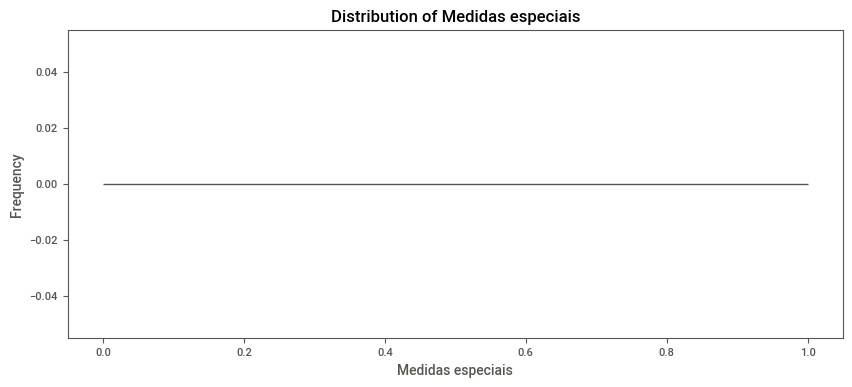

c:\Users\rene_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


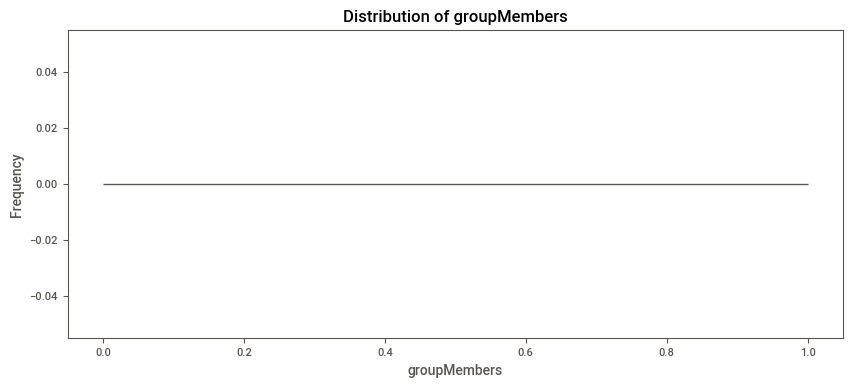

In [41]:
# Histograms or box plots for numerical data
for column in one_hot_encoded_df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(one_hot_encoded_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
